# Reading Titanic Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\New_Data\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Titanic set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\New_Data\titanic.csv')
df

# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


##  1. Handle Missing Data
### We need to handle missing values in the dataset. For example, the Age and Embarked columns have missing values.

In [4]:

# Check for missing values
print(df.isnull().sum())

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop rows where 'Cabin' is missing (if necessary)
df.dropna(subset=['Cabin'], inplace=True)

# Check if there are any missing values left
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_11280\2829557239.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_11280\2829557239.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### In this step:

- We check for missing values using isnull().sum().
- We replace missing Age values with the median age.
- We replace missing Embarked values with the most frequent port of embarkation (using mode()).
- We drop rows where the Cabin column is missing since it has too many missing values, but this is optional depending on your analysis

## 3. Convert Categorical Data to Numerical Data
**Many machine learning and visualization techniques work with numerical data, so we will convert categorical columns like Sex and Embarked to numeric representations.**

In [5]:
# Convert 'Sex' column to numerical values: 0 for female, 1 for male
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' column to numerical values
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Display the first few rows again to verify the changes
print(df.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name  Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
6                             McCarthy, Mr. Timothy J    1  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut    0   4.0      1   
11                           Bonnell, Miss. Elizabeth    0  58.0      0   

    Parch    Ticket     Fare Cabin  Embarked  
1       0  PC 17599  71.2833   C85         0  
3       0    113803  53.1000  C123         2  
6       0     17463  51.8625   E46         2  
10      1   PP 9549  16.7000    G6         2  
11      0    113783  26.5500  C103         2  


###  We use the map() function to convert the Sex column into numerical values (0 for female and 1 for male).
#### Similarly, we convert the Embarked column to numerical values where each port is represented by a unique integer.

###  4. Visualize the Data
####  Now, let's visualize the cleaned data. For example, we can plot the distribution of Age or the survival rate based on Sex.

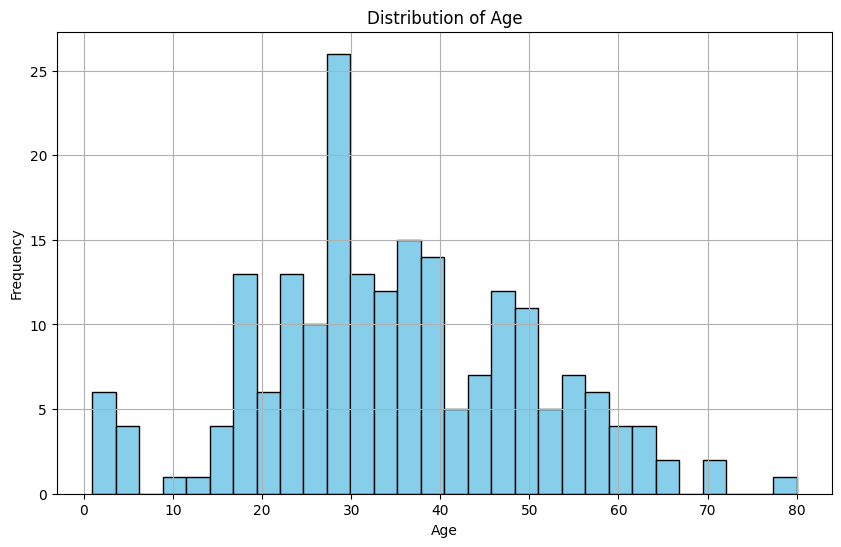

In [6]:
# Plot 1: Distribution of Age
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###  We use plt.hist() to create a histogram of the Age column.
###  The bins=30 argument creates 30 bins (you can adjust this for more/less granularity).
###  The color='skyblue' and edgecolor='black' arguments set the colors for the bars and their edges, respectively.


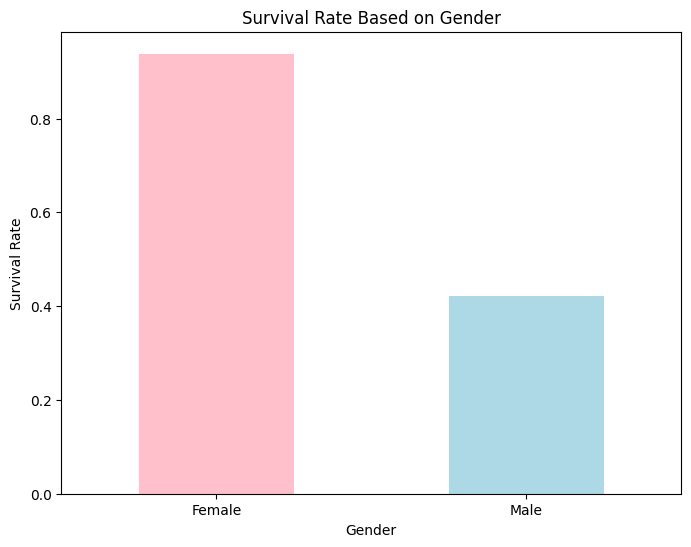

In [7]:
plt.figure(figsize=(8,6))
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()

survival_rate_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.show()

###  We calculate the mean survival rate for each gender using groupby('Sex')['Survived'].mean(). This gives us the proportion of people who survived for each gender.
###  We use plot(kind='bar') to create a bar plot. The bars are colored differently for each gender (female in pink, male in light blue).
###  The xticks([0, 1], ['Female', 'Male'], rotation=0) ensures the x-axis is labeled correctly for females and males.


##  5. Putting It All Together

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_11280\679639037.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_11280\679639037.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



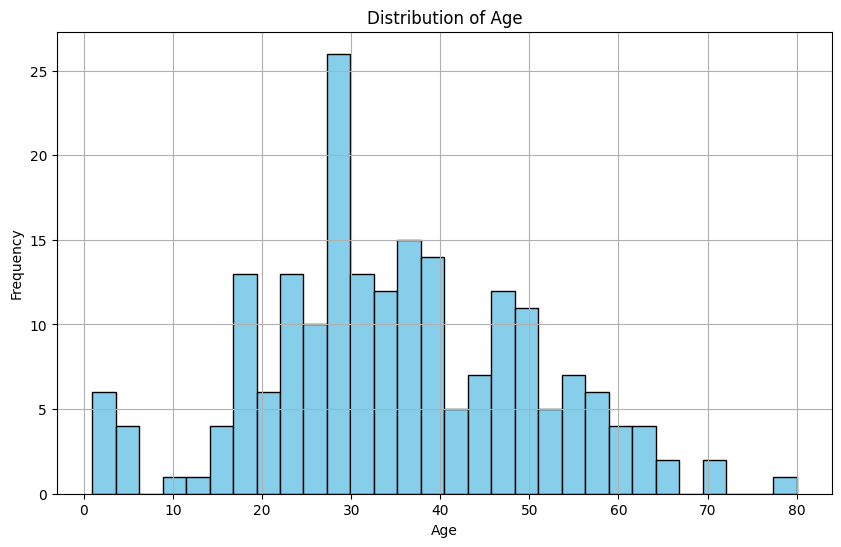

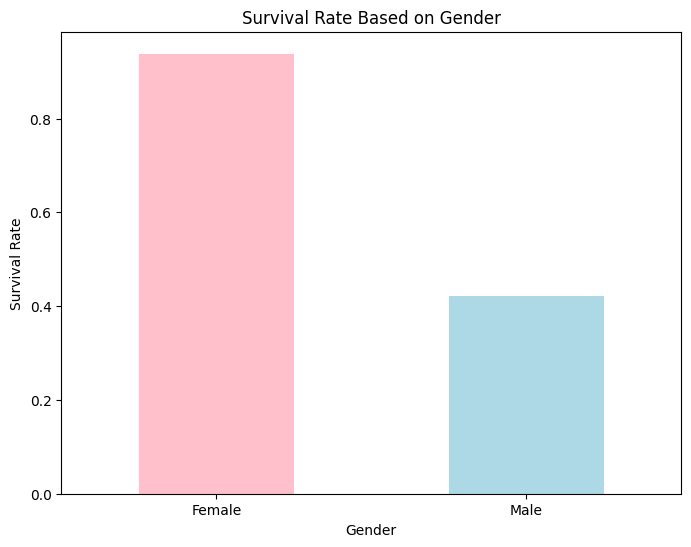

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\New_Data\titanic.csv')
df

# Handle missing data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.dropna(subset=['Cabin'], inplace=True)

# Convert categorical data to numerical
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Plot: Distribution of Age
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot: Survival Rate Based on Gender
plt.figure(figsize=(8,6))
survival_rate_by_gender = t=df.groupby('Sex')['Survived'].mean()
survival_rate_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.show()

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_11280\1064008118.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df_clean.groupby('sex')['survived'].mean()


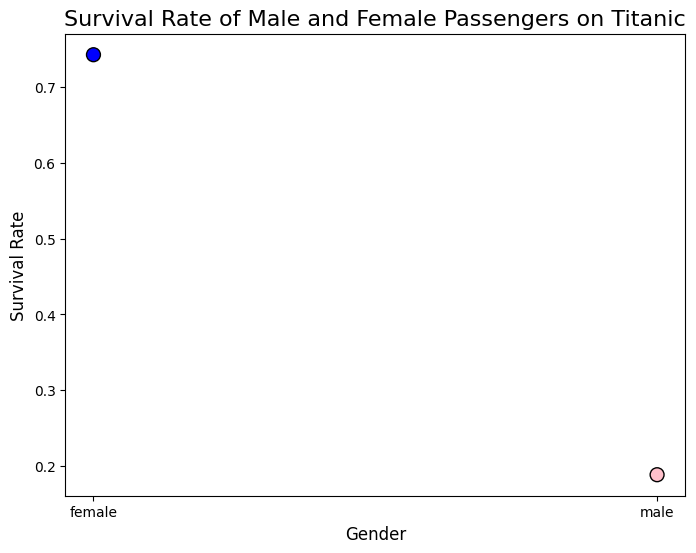

In [10]:
#Draw  a scatterplot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Import Titanic data
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\New_Data\titanic.csv')
df

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Clean the data: drop rows where 'Survived' or 'Sex' is missing
df_clean = df.dropna(subset=['survived', 'sex'])

# Convert 'Sex' to categorical (if not already)
df_clean['sex'] = df_clean['sex'].astype('category')

# Calculate survival rates for males and females
survival_rate = df_clean.groupby('sex')['survived'].mean()

# Plotting the survival rates using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(survival_rate.index, survival_rate.values, color=['blue', 'pink'], s=100, edgecolors='black')

# Adding titles and labels
plt.title('Survival Rate of Male and Female Passengers on Titanic', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Displaying the plot
plt.show()

In [ ]:
#Draw piechart
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset (you can download it from Kaggle or use a pre-existing one)
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\New_Data\titanic.csv')
df

# Display the first few rows to confirm the data is loaded correctly
print(df.head())